In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/mobile_price_prediction.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# shape of dataframe
data.shape

(2000, 21)

In [5]:
# list out columns of dataframe
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
# drop 'ID' columns from dataframe
# data = data.drop('id', axis=1)

In [7]:
# statistical overview of dataframe
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# renaming columns names in a meaningful names
data = data.rename(columns = {"blue" : "bluetooth",
                              "fc" : "fc_megapixels",
                              "pc" : "pc_megapixels",
                              "m_dep" : "m_depth"})

In [9]:
# duplicated() checks record is duplicated or not.
dupes = data.duplicated()
sum_dupes = sum(dupes)
print("Duplicates : ", sum_dupes)
dupes.head()

Duplicates :  0


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [10]:
# drop duplicates rows using drop_duplicates()
data = data.drop_duplicates()
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixels,four_g,int_memory,m_depth,mobile_wt,n_cores,pc_megapixels,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
# find missing values
# data.isnull().sum()
data.isna().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixels    0
four_g           0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixels    0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
# filling missing values with constant number
data['fc_megapixels'] = data['fc_megapixels'].fillna(0)

In [13]:
# check unique values present in particular column
len(data['ram'].unique())

1562

In [14]:
# filling mobiles weights column with median values
data['mobile_wt'] = data['mobile_wt'].fillna(data['mobile_wt'].median())

In [15]:
# save dataframe file in csv extension
data.to_csv('mobile_cleaned_file.csv', index = False)

**Handling with Outliers**

In [16]:
# extract all numeric features from original data into separate dataframe
numeric_data = data.drop(['bluetooth', 'dual_sim', 'four_g', 'three_g', 
                          'touch_screen', 'wifi', 'price_range'], axis=1)
numeric_data.head()

,battery_power,clock_speed,fc_megapixels,int_memory,m_depth,mobile_wt,n_cores,pc_megapixels,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [17]:
# extract categorical_data or discrete_data from dataframe 
categorical_data = data[['bluetooth', 'dual_sim', 'four_g', 'three_g', 
                          'touch_screen', 'wifi', 'price_range']]
categorical_data.head()

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


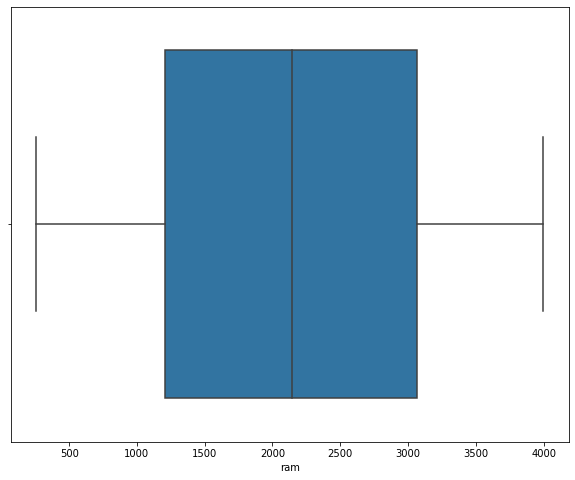

In [19]:
# make subplots of figure size
fig, ax = plt.subplots(figsize=(10,8))

# using bloxplot, plot 'ram' as orientation vertical
sns.boxplot(numeric_data['ram'], orient='v')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


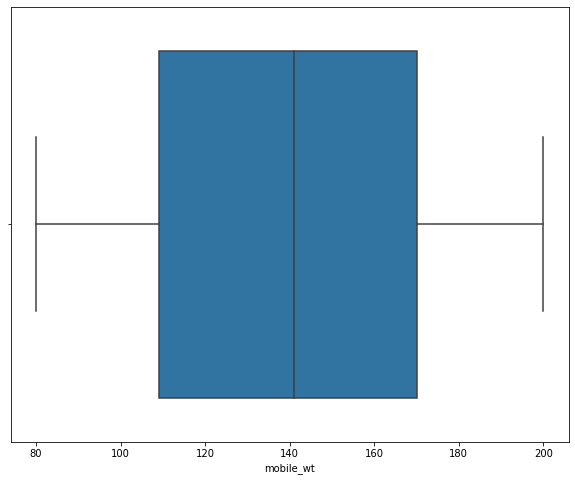

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

# using bloxplot, plot 'mobile_wt' as orientation vertical
sns.boxplot(numeric_data['mobile_wt'], orient='v')

[Text(0, 0, 'battery_power'),
 Text(0, 0, 'clock_speed'),
 Text(0, 0, 'fc_megapixels'),
 Text(0, 0, 'int_memory'),
 Text(0, 0, 'm_depth'),
 Text(0, 0, 'mobile_wt'),
 Text(0, 0, 'n_cores'),
 Text(0, 0, 'pc_megapixels'),
 Text(0, 0, 'px_height'),
 Text(0, 0, 'px_width'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'sc_h'),
 Text(0, 0, 'sc_w'),
 Text(0, 0, 'talk_time')]

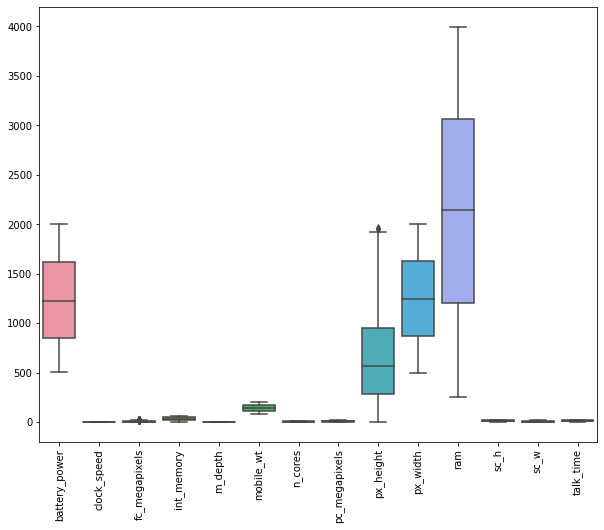

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
bp = sns.boxplot(data=numeric_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

In [22]:
# standarise dataframe for calculating z-scores, using StandardScaler from sklearn
# StandardScaler() scales numeric_data to have zero mean and unit variance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # instance StandardScaler object

scaled_array = scaler.fit_transform(numeric_data)

In [23]:
 # creating new dataframe containing scales values
scaled_data = pd.DataFrame(scaled_array, columns = numeric_data.columns)
scaled_data.head()

,battery_power,clock_speed,fc_megapixels,int_memory,m_depth,mobile_wt,n_cores,pc_megapixels,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240


[Text(0, 0, 'battery_power'),
 Text(0, 0, 'clock_speed'),
 Text(0, 0, 'fc_megapixels'),
 Text(0, 0, 'int_memory'),
 Text(0, 0, 'm_depth'),
 Text(0, 0, 'mobile_wt'),
 Text(0, 0, 'n_cores'),
 Text(0, 0, 'pc_megapixels'),
 Text(0, 0, 'px_height'),
 Text(0, 0, 'px_width'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'sc_h'),
 Text(0, 0, 'sc_w'),
 Text(0, 0, 'talk_time')]

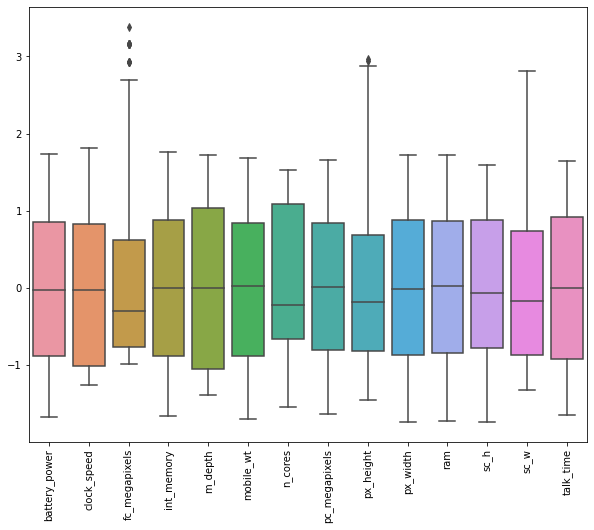

In [24]:
# box plot of scaled_data
fig, ax = plt.subplots(figsize=(10, 8))
bp = sns.boxplot(data = scaled_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [25]:
# Consider any data point that is outside of 1.5 times of interquartile range from either the 25th or the 75th percentile as an outlier.
Q1 = numeric_data.quantile(0.25)
Q2 = numeric_data.quantile(0.75)
IQR = Q2 - Q1 # interquartile range for all of the numeric
print(IQR)

battery_power     763.50
clock_speed         1.50
fc_megapixels       6.00
int_memory         32.00
m_depth             0.60
mobile_wt          61.00
n_cores             4.00
pc_megapixels      10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [26]:
 # removing outliers 
 outliers_removed_data = numeric_data[- ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q2 + 1.5 * IQR))).any(axis=1)]
 outliers_removed_data.shape

(1980, 14)

[Text(0, 0, 'battery_power'),
 Text(0, 0, 'clock_speed'),
 Text(0, 0, 'fc_megapixels'),
 Text(0, 0, 'int_memory'),
 Text(0, 0, 'm_depth'),
 Text(0, 0, 'mobile_wt'),
 Text(0, 0, 'n_cores'),
 Text(0, 0, 'pc_megapixels'),
 Text(0, 0, 'px_height'),
 Text(0, 0, 'px_width'),
 Text(0, 0, 'ram'),
 Text(0, 0, 'sc_h'),
 Text(0, 0, 'sc_w'),
 Text(0, 0, 'talk_time')]

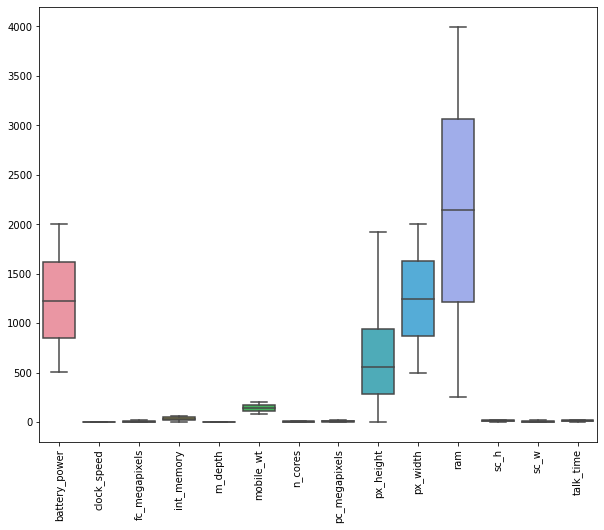

In [27]:
# box plot of outliers_removed_data
fig, ax = plt.subplots(figsize=(10, 8))
bp = sns.boxplot(data = outliers_removed_data)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 90)

In [28]:
# save dataframe file in csv extension
outliers_removed_data.to_csv('mobile_outliers_file.csv', index = False)

**Build Logistic Regression Model**

In [29]:
# import train_test_split from sklearn for splitting dataset
from sklearn.model_selection import train_test_split

In [30]:
# resetting index of scaled_data
scaled_data = scaled_data.reset_index()

In [31]:
# resetting index of categorical_data
categorical_data = categorical_data.reset_index()

In [32]:
# concating both the data and prepare final dataframe
final_df = pd.concat([scaled_data, categorical_data], axis=1)

In [33]:
final_df.head()

,index,battery_power,clock_speed,fc_megapixels,int_memory,m_depth,mobile_wt,n_cores,pc_megapixels,px_height,px_width,ram,sc_h,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,0,0,0,0,1,1
1,1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,1,1,1,1,0,2
2,2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,2,1,1,1,1,1,0,2
3,3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,3,1,0,0,1,0,0,2
4,4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,4,1,0,1,1,1,0,1


In [34]:
# checking for null or missing values
final_df.isnull().sum()

index            0
battery_power    0
clock_speed      0
fc_megapixels    0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixels    0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
index            0
bluetooth        0
dual_sim         0
four_g           0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [35]:
# drop 'price_range' from final_df and store it in 'y' for labelling data
x = final_df.drop('price_range', axis=1)
y = final_df['price_range']

In [36]:
# splitting dataframe
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2,
                                                    random_state=101)

In [38]:
# import Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression

# prepare model 
logistic_model = LogisticRegression(solver='lbfgs',
                                    multi_class='multinomial',
                                    max_iter=10000)

In [40]:
# train logistic regression model
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [41]:
# test logistic_model using testing dataframe
logistic_model.score(x_test, y_test)

0.935